### Notebook 5 Convolutional Neural Networks and Competition!
===

Inspired by:http://www.robots.ox.ac.uk/~vgg/practicals/cnn/ and 
https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html

[_Convolutional neural networks_](http://www.deeplearningbook.org/contents/convnets.html) (CNNs) are specialised network type for processing data that has some continuity between adjacent components. Examples include time-series data or and image data.

### CNN Building Blocks:
A typical layer of a convolutional neural network consists of two stages. In the first stage the layer performs several convolutions (a tensor product) in parallel with non-linear activation. In the second stage we use a pooling function to modify the output to the next layer. 

### Convolution

### Definition
Given a two-dimensional image, **$I$**, and a small matrix **$K$** of size $h \times w$, (known as _convolution kernel_), which encodes a way of extracting an intersting image feature, we compute the convolved image $I*K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of the elementwise products between the image and the kernel:
\begin{equation}
(I*K)_{xy} = \sum_{i=1}^h \sum_{j=1}^w K_{ij} \cdot I_{x+i-1,y+j-1}
 \end{equation}
 
![](https://i.imgur.com/zixMZWO.gif)

Convolution takes advantage of the structure of the information encoded in the image - for example, pixels that are spatially closer will 'cooperate' in forming a feature more than pixels that are on opposite corners. In addition, if there is an important feature for defining the image's label, it will be equally important if this feature is found in the image, regardless of the location.


### Pooling
A pooling function replaces the output of the network at a certain location with a summary statistic of the nearby outputs. For example, the **max pooling** operation reports the maximum output within a rectangular neighbourhood as shown below. Other pooling functions include the average of a rectangular neighbourhood and a weighted average based on the distance from the central pixel.
![](https://i.imgur.com/eg8q5Mr.png)
Pooling helps to make the representation approximately invariant to small translations of the input. Invariance to translation means that if we shift the image by a few pixels, the values of the most of the pooled outputs do not change. For example, when determining whether an image contains a face, we do not need to know the precise location of the eyes, we just need to know that there is an eye on the left side of the face and another eye on the right side.

### Back-propagation
Like standard neural networks, CNN are trained by optimising their parameters such as to minimise a cost function. This process is usually down using a gradient based optimisation algorithm such as Stochastic Gradient Descent. Like in standard neural networks, back-probagation is used to find the gradient of the cost function of the CNN in terms of its parameters. Since, calculating the gradients using back-propagation can be a very involved process, especially in deep architecture, modern neural network software packages such as Tensorflow and Theano represent neural networks as computational graphs thus enabling back-propagation to be performed automatically and efficiently.

### Putting It All Together: A Common CNN
A typical CNN architecture consists of multiple alternating convolutional and pooling layers followed by a set of dense (fully-connected layers). The image below shows an example of a standard CNN architecutre.

![](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png)

The intuition behind CNN architectures such as the one above is that the first few layers learn low-level features such as edges and texture, while the deeper layers learn more high-level features that are dataset specific such as typical object shape or facial features. This idea is illustrated in the figure below.
![](http://vision03.csail.mit.edu/cnn_art/data/single_layer.png)

### CNN  Example - CIFAR-10:
We are going to demonstrate CNNs on the CIFAR-10 classification task. CIFAR-10 is a dataset consisting of 60000 32x32 RGB images each belonging to one of 10 classes. Here is a sample of the images.

![](http://karpathy.github.io/assets/cifar_preview.png)

We are going to train a CNN to classify images from this dataset into their correct classes. 

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Loading and exlporing the dataset:
We start off by loading the dataset into memory. Fortunately, Keras has an in-built API to automatically download and load the CIFAR-10 dataset.

In [34]:
((train_X, train_Y), (test_X, test_Y)) = cifar10.load_data()
print('train_X shape:', train_X.shape)
print('Number of training examples:', train_X.shape[0])
print('Number of test examples:', test_X.shape[0])

train_X shape: (50000, 32, 32, 3)
Number of training examples: 50000
Number of test examples: 10000


In [35]:
classes = np.unique(train_Y)
num_classes = classes.shape[0]
print('There are', num_classes, 'classes:')
print(classes)

There are 10 classes:
[0 1 2 3 4 5 6 7 8 9]


In [36]:
class_dictionary = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

We can view random samples from the dataset using the code below. Feel free to change the value of `index` to view different samples from the dataset.

This is class: bird


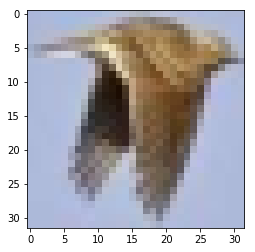

In [37]:
index = 123
print('This is class:', class_dictionary[train_Y[index][0]])
plt.imshow(train_X[index]);

In order for our dataset to be compatible with the Keras API, we nee our labels to be represented using [one-hot encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science). We also want to convert the image representation from 8-bit (integer) rgb pixels to 32-bit floating points between 0 and 1.

In [38]:
# Convert class label to one-hot encoded vector
train_Y = keras.utils.to_categorical(train_Y, num_classes)
test_Y = keras.utils.to_categorical(test_Y, num_classes)

In [39]:
# Convert the images to 32-bit float 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# Normalise the images from 0 to 1
train_X = train_X/255
test_X = test_X/255

In [40]:
train_XV=train_X.reshape(50000,3072)
test_XV=test_X.reshape(10000,3072)

* Example of a standard network with one hidden layer

In [41]:
model1=Sequential()
model1.add(Dense(64,input_dim=3072,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [42]:
model1.fit(train_XV,train_Y,epochs=5,batch_size=128);
score=model1.evaluate(test_XV,test_Y,batch_size=32);
print("\n\nNumber correctly estimated on test set",100*score[1],"%")

Epoch 1/5
50000/50000 [==============================] - 3s - loss: 2.1028 - acc: 0.2509     
Epoch 2/5
50000/50000 [==============================] - 3s - loss: 1.9013 - acc: 0.3227     
Epoch 3/5
50000/50000 [==============================] - 3s - loss: 1.8179 - acc: 0.3528     
Epoch 4/5
50000/50000 [==============================] - 3s - loss: 1.7684 - acc: 0.3721     
Epoch 5/5
 9568/10000 [===========================>..] - ETA: 0s

Number correctly estimated on test set 37.9 %


---


### Convolutional network that improves accuracy
Modification of Ayman's and Iliana's model

In [43]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',input_shape=train_X.shape[1:],activation='relu'))
model.add(Conv2D(16, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                230464    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 233,882
Trainable params: 233,882
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Initialise SGD optimiser
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(train_X, train_Y,batch_size=128,epochs=2,shuffle=True)
score=model.evaluate(test_X,test_Y,batch_size=32);
print("\n\nNumber correctly estimated ",100*score[1],"%")

Epoch 1/5
50000/50000 [==============================] - 69s - loss: 1.6416 - acc: 0.4127    
Epoch 2/5
 1408/50000 [..............................] - ETA: 71s - loss: 1.3811 - acc: 0.5135

KeyboardInterrupt: 

---
